Tennis Data

1-How many tennis players are included in the dataset?

2-What is the average height of the players?

3-Which player has the highest number of wins?

4-What is the longest match recorded in terms of duration?

5-How many sets are typically played in a tennis match?

6-Which country has produced the most successful tennis players?

7-What is the average number of aces per match?

8-Is there a difference in the number of double faults based on gender?

9-Which player has won the most tournaments in a single month?

10-Is there a correlation between a player's height and their ranking?

11-What is the average duration of matches?

12-What is the average number of games per set in men's matches compared to women's
matches?

13-What is the distribution of left-handed versus right-handed players?

In [2]:
import pandas as pd
away_team=pd.read_csv("../data/processed/away_team.csv")
#Determine the type of column
away_team['plays'].dtype
#Fill null items from plays column
away_team['plays']=away_team['plays'].fillna('unknown')
#there is no null data anymore
away_team['plays'].isnull().sum()

home_team=pd.read_csv("../data/processed/home_team.csv")
#Determine the type of column
home_team['plays'].dtype
#Fill null items from plays column
home_team['plays']=home_team['plays'].fillna('unknown')
#there is no null data anymore
home_team['plays'].isnull().sum()
#concat team_away and home_team
all_teams=pd.concat([away_team,home_team],ignore_index=True)
#Delete unknown
all_teams_clean=all_teams[all_teams['plays'].isin(['right-handed','left-handed'])]
all_teams_clean.head()
count=all_teams_clean['plays'].value_counts()
print(f"The number of right-handed versus left-handed players is as follows:")
for hand,cnt in count.items():
    print(f"{hand} players:{cnt}")


The number of right-handed versus left-handed players is as follows:
right-handed players:21600
left-handed players:2843


In [3]:
percent=count/count.sum()*100
print(percent)

plays
right-handed    88.368858
left-handed     11.631142
Name: count, dtype: float64


<Axes: xlabel='plays'>

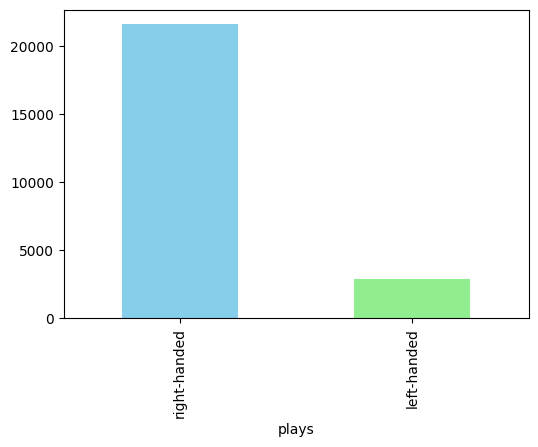

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
count.plot(kind='bar',color=['skyblue','lightgreen'])

14-What is the most common type of surface used in tournaments?

In [5]:
import pandas as pd
path = "../data/processed/tournament.csv"
tournament=pd.read_csv(path)
#first check the null data by counting them
number_of_null_data=tournament['ground_type'].isnull().sum()
print("Number of Null data before cleaning:",number_of_null_data)
#Start cleaning the data
davis_cup_rows = tournament[tournament["tournament_category_name"] == "Davis Cup"]
#all ground_type of davis cup is NaN
davis_cup_rows["ground_type"].isna().all()
#ground type is dependent on host so it is normal that the value is NaN
tournament.loc[tournament["tournament_category_name"] == "Davis Cup", "ground_type"] = "Host-dependent"
tournament[tournament['ground_type'].isnull()]['tournament_category_name']
itef_men_rows = tournament[tournament["tournament_category_name"] == "ITF Men"]
#find the most common type of ground of ITF Men in order to fill the null amounts
most_common_ground_type_of_itf_men=itef_men_rows['ground_type'].value_counts().idxmax()
tournament.loc[tournament["tournament_category_name"] == "ITF Men", "ground_type"] = most_common_ground_type_of_itf_men
#count the null data in order to be sure of cleaning null data
number_of_null_data_after_cleaning=tournament['ground_type'].isnull().sum()
print("Number of Null data after cleaning:",number_of_null_data_after_cleaning)
#data is cleaned and there is no null data for ground type column
most_common_ground_type_of_tournament=tournament['ground_type'].value_counts().idxmax()
count=tournament['ground_type'].value_counts().max()
print(f"The most common type of surface is:{most_common_ground_type_of_tournament} in {count} tournaments")

Number of Null data before cleaning: 562
Number of Null data after cleaning: 0
The most common type of surface is:Hardcourt outdoor in 24845 tournaments


15-How many distinct countries are represented in the dataset?

In [6]:
import pandas as pd
away_team=pd.read_csv("../data/processed/away_team.csv")
home_team=pd.read_csv("../data/processed/home_team.csv")
venue_team=pd.read_csv("../data/processed/venue.csv")


dataset_all_countries=pd.concat([away_team['country'],home_team['country'],venue_team['country']],ignore_index=True)
#Check for null values
dataset_all_countries.isna().sum()
#Clean the data and drop null values
dataset_all_countries_cleaned = dataset_all_countries.dropna()
#If we consider Scotlan and England and United Kingdom as one country 
# then we should replace Scotland and England with United Kingdom
processed_countries = dataset_all_countries_cleaned.replace({
    "Scotland": "United Kingdom",
    "England": "United Kingdom"
})

# 4. Select unique values
distinct_dataset_all_countries = processed_countries.unique()

# 5. Print result
number_of_distinct_dataset_all_countries = len(distinct_dataset_all_countries)
print(f"{number_of_distinct_dataset_all_countries} distinct countries found in the dataset as follows:")
print(distinct_dataset_all_countries)


106 distinct countries found in the dataset as follows:
['Canada' 'Italy' 'Spain' 'France' 'Kazakhstan' 'Japan' 'Australia' 'USA'
 'Germany' 'United Kingdom' 'Argentina' 'Switzerland' 'Russia' 'China'
 'Croatia' 'Denmark' 'Hungary' 'South Africa' 'Ukraine' 'Czech Republic'
 'Slovakia' 'Belarus' 'Netherlands' 'Poland' 'Estonia' 'Slovenia'
 'Dominican Republic' 'Cyprus' 'Sweden' 'Serbia' 'Hong Kong' 'Egypt'
 'Finland' 'Greece' 'Turkey' 'Austria' 'Philippines' 'Latvia' 'Brazil'
 'South Korea' 'Georgia' 'Romania' 'Mexico' 'Bulgaria' 'Portugal'
 'Belgium' 'Ecuador' 'Syria' 'Costa Rica' 'Luxembourg' 'Zimbabwe'
 'Morocco' 'India' 'Bosnia & Herzegovina' 'Indonesia' 'Israel'
 'Chinese Taipei' 'Thailand' 'Moldova' 'Monaco' 'Peru' 'Barbados'
 'New Zealand' 'Norway' 'Guadeloupe' 'Colombia' 'Algeria' 'Uzbekistan'
 'Tunisia' 'Jordan' 'Chile' 'Uruguay' 'North Macedonia' 'Malta'
 'Liechtenstein' 'Kyrgyzstan' 'Lebanon' 'Bahamas' 'Paraguay' 'Bolivia'
 'New Caledonia' 'Lithuania' 'Ivory Coast' 'Ireland' 

16-Which player has the highest winning percentage against top 10 ranked opponents?

In [7]:
import pandas as pd


home_team = pd.read_csv("../data/processed/home_team.csv")
home_team = home_team[['match_id','full_name','current_rank','player_id']]

away_team = pd.read_csv("../data/processed/away_team.csv")
away_team = away_team[['match_id','full_name','current_rank','player_id']]

event = pd.read_csv("../data/processed/event.csv")
event = event[['match_id','winner_code']]


matches = home_team.merge(away_team, on='match_id', suffixes=("_home","_away"))
matches = event.merge(matches, on='match_id')


matches = matches.dropna(subset=['current_rank_home','current_rank_away','winner_code'])
home_vs_top_rank10 = matches[matches['current_rank_away'] <= 10].copy()
away_vs_top_rank10 = matches[matches['current_rank_home'] <= 10].copy()


home_vs_top_rank10['is_win'] = home_vs_top_rank10['winner_code']==1
away_vs_top_rank10['is_win'] = away_vs_top_rank10['winner_code']==2

home_stat = home_vs_top_rank10.groupby(['player_id_home','full_name_home']).agg(
    wins=('is_win','sum'),
    counts=('is_win','count')
).reset_index()

away_stat = away_vs_top_rank10.groupby(['player_id_away','full_name_away']).agg(
    wins=('is_win','sum'),
    counts=('is_win','count')
).reset_index()
home_stat = home_stat.rename(columns={
    'player_id_home':'player_id',
    'full_name_home':'full_name',
    'wins':'home_wins',
    'counts':'home_matches'
})

away_stat = away_stat.rename(columns={
    'player_id_away':'player_id',
    'full_name_away':'full_name',
    'wins':'away_wins',
    'counts':'away_matches'
})
home_stat
total_stat=pd.merge(home_stat,away_stat,on=['player_id','full_name'],how='outer').fillna(0)
total_stat['total_wins']=total_stat['home_wins']+total_stat['away_wins']
total_stat['total_matches']=total_stat['home_matches']+total_stat['away_matches']
total_stat['percentage_of_wins']=total_stat['total_wins']/total_stat['total_matches']*100
total_stat = total_stat[total_stat['total_matches'] >= 2]
top_player = total_stat.sort_values(by='percentage_of_wins', ascending=False).iloc[0]
print(top_player[['full_name','percentage_of_wins','total_matches']])




full_name             Michelsen, Alex
percentage_of_wins              100.0
total_matches                     8.0
Name: 134, dtype: object


17-What is the average number of breaks of serve per match?

In [19]:
import pandas as pd

statistics_df = pd.read_csv("../data/processed/statistics.csv")

#   select break_points_converted
breaks = statistics_df[statistics_df['statistic_name'] == 'break_points_converted'].copy()
#calculate real break point for home and away
breaks['total_breaks'] = breaks['home_value'] + breaks['away_value']
#calculate mean
avg_breaks_per_match = breaks.groupby('match_id')['total_breaks'].sum().mean()
print(f"The average number of breaks of serve per match is {avg_breaks_per_match}")


The average number of breaks of serve per match is 26.232423417888178
